<a href="https://colab.research.google.com/github/21p31a04g5/Data-Science-and-Machine-Learning-Project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Building a system that can predict whether a person has diabetes or not with the help of Machine Learning**

In [1]:
import numpy as np
import pandas as pd

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.size

6912

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<ipython-input-11-f8aed6c9399e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=diabetes_dataset,palette='inferno')


<Axes: xlabel='Outcome', ylabel='count'>

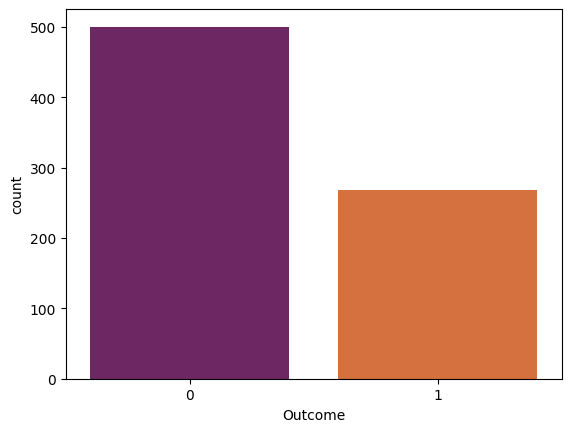

In [11]:
import seaborn as sns
sns.countplot(x='Outcome',data=diabetes_dataset,palette='inferno')

<Axes: xlabel='Outcome', ylabel='count'>

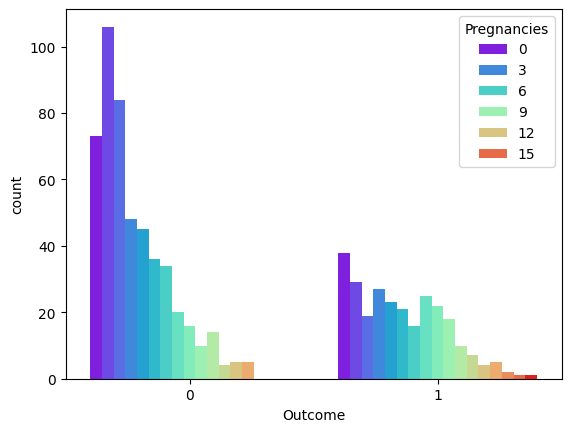

In [12]:
sns.countplot(x='Outcome',hue='Pregnancies',data=diabetes_dataset,palette='rainbow')

<Axes: xlabel='Age', ylabel='Glucose'>

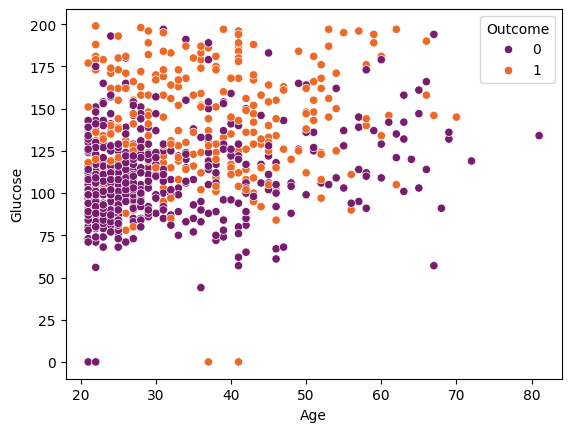

In [13]:
sns.scatterplot(x='Age',y='Glucose',data=diabetes_dataset,hue='Outcome',palette='inferno')

<Axes: xlabel='Age', ylabel='BloodPressure'>

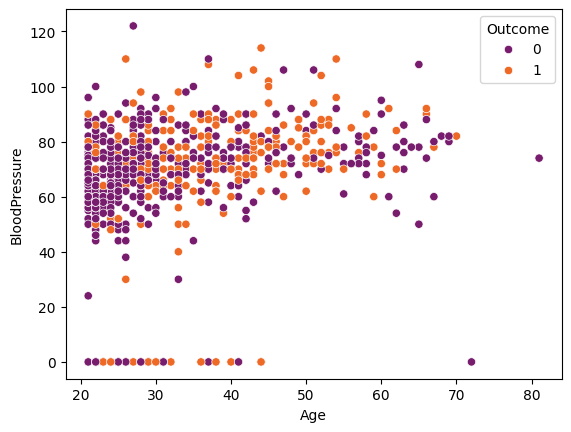

In [14]:
sns.scatterplot(x='Age',y='BloodPressure',data=diabetes_dataset,hue='Outcome',palette='inferno')

In [15]:
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


We can see there are some inconsistent values in the input data which need to be modified to a suitable range that will become easy and accurate for the machine learning model

In [18]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)

In [19]:
#standardaized_data = scaler.transform(X)

In [20]:
#standardaized_data

In [21]:
#X = standardaized_data

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [23]:
X.shape,X_train.shape,X_test.shape

((768, 8), (614, 8), (154, 8))

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7850162866449512

In [35]:
model.score(X_test,Y_test)

0.7532467532467533

In [38]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,Y_train)
model1.score(X_train,Y_train)

1.0

In [39]:
model1.score(X_test,Y_test)

0.7597402597402597

In [40]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train,Y_train)
model2.score(X_train,Y_train)

0.7980456026058632

In [41]:
model2.score(X_test,Y_test)

0.7272727272727273

Here from the above classification algorithms we can come to a conclude that SVM performs better without any over fitting and under fitting.

---
                                 Training                   Testing                   

Logistic Regression  -----   0.7850162866449512 ----- 0.7532467532467533 ❌\
Random Forest------------   1.0    -------------------------------------   0.7597402597402597 ❌\
kNN------------------------------   0.7980456026058632   ------    0.7272727272727273 ❌\
SVM ----------------------------   0.7833876221498371  -------     0.7727272727272727 ✅

In [24]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [26]:
#for training data
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [27]:
training_data_accuracy

0.7833876221498371

In [28]:
#for testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [29]:
testing_data_accuracy

0.7727272727272727

Now we can make a system for this overall scenario

In [30]:
#first we take input data the changing to numpy array which works efficiently then reshaping because we dont give the outcome value as input
#and then we standardise the input values
input_data = (0,137,40,35,168,43.1,2.288,33)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Deploying the model

In [31]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [32]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [33]:
input_data = (0,137,40,35,168,43.1,2.288,33)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
